In [ ]:
# Common imports
#jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=9090 --no-browser
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

In [ ]:
from sklearn.model_selection import train_test_split
#define MAX_BEARING_1 0.122483
#define MAX_BEARING_2 0.224439
#define MAX_BEARING_3 0.543770
#define MAX_BEARING_4 0.244897

#define MIN_BEARING_1 0.001533
#define MIN_BEARING_2 0.002441
#define MIN_BEARING_3 0.003663
#define MIN_BEARING_4 0.001428


In [ ]:
# from google.colab import drive 
# path_to_mount = '/content/gdrive/'
# drive.mount(path_to_mount)

In [ ]:
# gdrive_path = path_to_mount + 'MyDrive/'
# data_path  = 'Dados/4th_test/txt'

# LOG_DIR_NAME = gdrive_path + data_path

In [ ]:
# data_dir = LOG_DIR_NAME
# merged_data = pd.DataFrame()

In [ ]:
# for filename in os.listdir(data_dir):
#     # print(filename)
#     dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
#     dataset_mean_abs = np.array(dataset.abs().mean())
#     dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
#     dataset_mean_abs.index = [filename]
#     merged_data = merged_data.append(dataset_mean_abs)

# merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']


In [ ]:
from pandas.io.parsers.readers import read_csv
X_test = pd.DataFrame()
merge_data = pd.read_csv('merged_dataset_BearingTest_3.csv')
df = merge_data.drop(['tempo'],axis = 1)
merge_data['tempo'] = pd.to_datetime(merge_data['tempo'])
X_test.index = pd.to_datetime(merge_data['tempo'], format='%Y.%m.%d.%H.%M.%S');
X_test = X_test.sort_index();
df.index = merge_data['tempo']
merged_data = df

In [ ]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S');
merged_data = merged_data.sort_index();
merged_data.to_csv('merged_dataset_BearingTest_3.csv');


In [ ]:
merged_data.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,6324.000000,6324.000000,6324.000000,6324.000000
mean,0.058445,0.064602,0.057390,0.044168
std,0.005061,0.009270,0.023149,0.011082
min,0.001533,0.002441,0.003663,0.001428
25%,0.056456,0.061598,0.052594,0.040506
50%,0.057655,0.062777,0.053938,0.043425
75%,0.059216,0.064786,0.055308,0.044281
max,0.122483,0.224439,0.543770,0.244897


In [ ]:
def mapeia(x, in_min, in_max, out_min, out_max):
    df1 = x.reset_index()
    df1 = ((x - in_min) * (out_max - out_min)) / (in_max - in_min) + out_min
    return df1

In [ ]:
# teste = mapeia(merged_data, merged_data.min(),merged_data.max(),0,255).round(0)
# teste.index =  merged_data.index
# teste.describe()

In [ ]:
dataset_train = merged_data['2004-03-28 11:21:57':'2004-04-10 00:21:57']
dataset_test = merged_data['2004-04-10 00:21:57':]
# dataset_test.plot(figsize = (12,6))
# dataset_test

In [ ]:
# dff = (dataset_test - dataset_train.min())/(dataset_train.max() - dataset_train.min())
# dff.head()
# print(dataset_train.min())
# dataset_train.max()

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

# X_test.to_excel("saida.xlsx")
# X_train = dataset_train;
# X_test = dataset_test;

# normal_x = stats.median_absolute_deviation(X_train)

In [ ]:
# X_test.head()

In [ ]:
dataset_test.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.063355,0.069354,0.075143,0.052171
std,0.010065,0.020400,0.051188,0.024280
min,0.001533,0.002441,0.003663,0.001428
25%,0.059448,0.061300,0.055576,0.043768
50%,0.060260,0.061890,0.056635,0.044214
75%,0.061528,0.065697,0.065190,0.045073
max,0.122483,0.224439,0.543770,0.244897


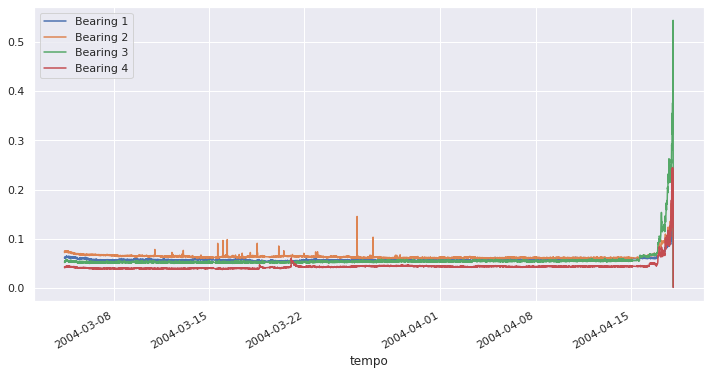

In [ ]:
merged_data.plot(figsize = (12,6))

In [ ]:
#dataset.to_csv('X_test_BearingTest_3.csv');

In [ ]:
from tensorflow.random import set_seed 

In [ ]:
set_seed(10)
act_func = 'relu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(30,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(30,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(30,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [ ]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

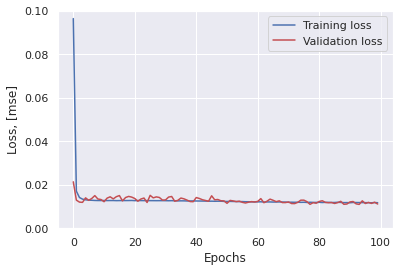

In [ ]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.3)

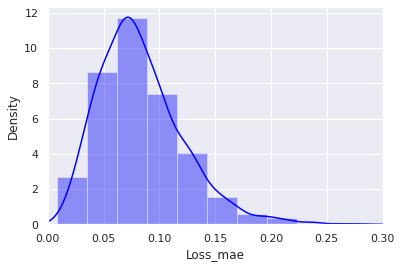

In [ ]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.3])

In [ ]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.25
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

In [ ]:
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored_1 = scored

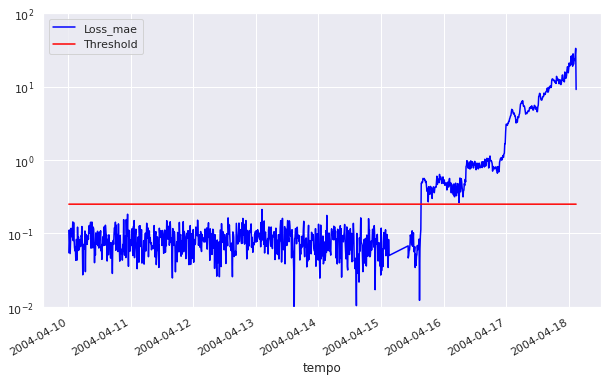

In [ ]:
scored.plot(logy= True , figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [ ]:
# scored.tail(300)
scored_1.to_csv('colab.csv', index=False)

In [ ]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)

In [ ]:
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.25
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

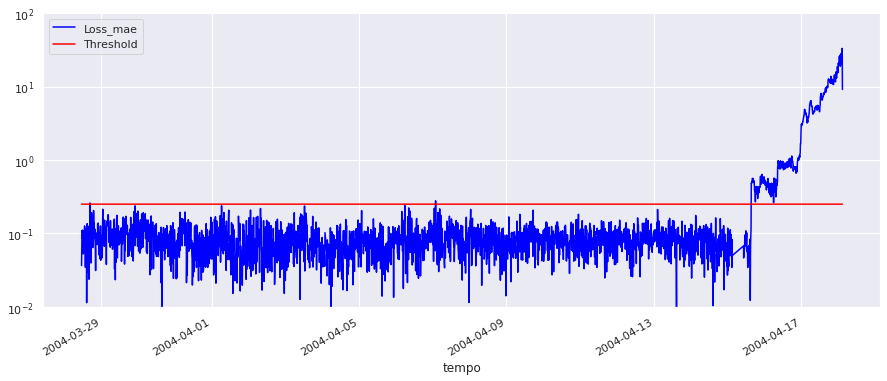

In [ ]:
scored.plot(logy= True , figsize = (15,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [ ]:
baseline_model_accuracy = model.evaluate(X_test, X_test, verbose=0)

In [ ]:
# Define paths to model files

MODELS_DIR = 'models/'

if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)

MODEL_TF = MODELS_DIR + 'model'

# Default
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'

# Post-training integer quantization
MODEL_PTQ_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_PTQ_TFLITE_MICRO = MODELS_DIR + 'model_qpa.cc'

# Quantization Aware Training
MODEL_QAT_TFLITE = MODELS_DIR + 'model_qat.tflite'
MODEL_QAT_TFLITE_MICRO = MODELS_DIR + 'model_qat.cc'

# Pruning
MODEL_PRU_TFLITE = MODELS_DIR + 'model_pru.tflite'
MODEL_PRU_TFLITE_MICRO = MODELS_DIR + 'model_pru.cc'

# Weight cluster
MODEL_CLU_TFLITE = MODELS_DIR + 'model_clu.tflite'
MODEL_CLU_TFLITE_MICRO = MODELS_DIR + 'model_clu.cc'


In [ ]:
# model.save(MODEL_TF)
import tempfile

model.save('test' + '.h5')
model.save(MODEL_TF)
_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)
print('Saved baseline model to:', keras_file)

INFO:tensorflow:Assets written to: models/model/assets


INFO:tensorflow:Assets written to: models/model/assets


Saved baseline model to: /tmp/tmpqqdmkdrt.h5


In [ ]:
# DEFAULT MODEL - CONVERT TO TFLITE

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Show Model
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

8016

In [ ]:
xx_train = X_train.to_numpy()
xx_test = X_test.to_numpy()

In [ ]:
def representative_dataset():
  for i in range(50):
    yield([xx_train[i].astype(np.float32).reshape(1, 4)])

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpw5d5jevg/assets


INFO:tensorflow:Assets written to: /tmp/tmpw5d5jevg/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)

In [ ]:
print(f'TF Model Size = {size_tf} kB')
print(f'TF Lite No Quant Model Size = {size_no_quant_tflite} kB')

TF Model Size = 4096 kB
TF Lite No Quant Model Size = 8016 kB


In [ ]:
def create_array(np_array, var_type, var_name, line_limit=80, indent=4):
    
    c_str = ''
    
    # Add array shape
    for i, dim in enumerate(np_array.shape):
        c_str += 'const unsigned int ' + var_name + '_dim' + str(i + 1) + ' = ' + str(dim) + ';\n'
    c_str += '\n'
        
    # Declare C variable
    c_str += 'const ' + var_type + ' ' + var_name
    for dim in np_array.shape:
        c_str += '[' + str(dim) + ']'
    c_str += ' = {\n'
    
    # Create string for the array
    indent = ' ' * indent
    array_str = indent
    line_len = len(indent)
    val_sep = ', '
    array = np_array.flatten()
    for i, val in enumerate(array):
        
        # Create a new line if string is over line limit
        val_str = str(val)
        if line_len + len(val_str) + len(val_sep) > line_limit:
            array_str += '\n' + indent
            line_len = len(indent)

        # Add value and separator
        array_str += val_str
        line_len += len(val_str)
        if (i + 1) < len(array):
            array_str += val_sep
            line_len += len(val_sep)

    # Add closing brace
    c_str += array_str + '\n};\n'
        
    return c_str
    
# Function to create a header file with given C code as a string
def create_header(c_code, name):
    
    c_str = ''
    
    # Create header guard
    c_str += '#ifndef ' + name.upper() + '_H\n'
    c_str += '#define ' + name.upper() + '_H\n\n'
    
    # Add provided code
    c_str += c_code
    
    # Close out header guard
    c_str += '\n#endif //' + name.upper() + '_H'
    
    return c_str

In [ ]:
# Construct header file
hex_array = [format(val, '#04x') for val in model_no_quant_tflite]
c_model = create_array(np.array(hex_array), 'unsigned char', 'wine')
header_str = create_header(c_model, 'wine')

In [ ]:
from os.path import join


In [ ]:
# Save C header file
with open(join('models', 'wine') + '.h', 'w') as file:
    file.write(header_str)

In [ ]:
# input_tensor = dataset_train
# pred = model.predict(input_tensor)
# mse = np.mean(np.power(dataset_train - pred, 2), axis=1)
# print("Prediction:", pred)
# print("MSE:", *mse)

In [ ]:
xx_test

array([[ 0.58415009,  0.2541186 ,  0.60108295,  0.35612298],
       [ 0.67882409,  0.27898488,  0.34714867,  0.20978517],
       [ 0.63922405,  0.37297164,  0.77307239,  0.27669449],
       ...,
       [ 7.01650185, 16.42886873, 53.78171661, 34.53607919],
       [ 7.48037313, 16.16752254, 75.081736  , 35.84893709],
       [-5.84547518, -6.51138134, -7.41396799, -7.76213556]])

In [ ]:
# POST-TRAINING INTEGER QUANTIZATION  --> TFLITE & CC

# Convert the model to the TensorFlow Lite format with quantization

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)

# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

def representative_dataset():
  for i in range(50):
    yield([xx_test[i].astype(np.float32).reshape(1, 4)])
  
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset

# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

model_tflite = converter.convert()

# Save the model to disk
open(MODEL_PTQ_TFLITE, "wb").write(model_tflite)

# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_PTQ_TFLITE} > {MODEL_PTQ_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = MODEL_PTQ_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_PTQ_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_PTQ_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_PTQ_TFLITE_MICRO}

In [ ]:
size_ptq_tflite = os.path.getsize(MODEL_PTQ_TFLITE)
print(f'TF Lite Post-Training Int Quantization Model Size = {size_ptq_tflite} kB')

TF Lite Post-Training Int Quantization Model Size = 4608 kB


In [ ]:
# ! pip install tensorflow==2.8.0
!pip3 install tensorflow_model_optimization

# Install xxd if it is not available
# !apt-get update && apt-get -qq install xxd
!apt-get -qq install xxd

In [ ]:
# QUANTIZATION AWARE TRAINING

import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(
  loss='mse',
  optimizer='adam'
)


q_aware_model.fit(np.array(X_train),np.array(X_train),
    epochs = NUM_EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split=0.05,
    verbose = 1
)

# model.fit(np.array(X_train),np.array(X_train),
#                   batch_size=BATCH_SIZE, 
#                   epochs=NUM_EPOCHS,
#                   validation_split=0.05,
#                   verbose = 1)

# print('Default Model Accuracy: %.3f' % model.evaluate(X_test, y_test)[1])
# print('Quantization Aware Model Accuracy: %.3f' % q_aware_model.evaluate(X_test, y_test)[1])

Epoch 1/100
171/171 [==============================] - 2s 4ms/step - loss: 0.0130 - val_loss: 0.0118
Epoch 2/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 3/100
171/171 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.0131
Epoch 4/100
171/171 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 5/100
171/171 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0125
Epoch 6/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0120 - val_loss: 0.0121
Epoch 7/100
171/171 [==============================] - 1s 6ms/step - loss: 0.0120 - val_loss: 0.0123
Epoch 8/100
171/171 [==============================] - 1s 6ms/step - loss: 0.0120 - val_loss: 0.0130
Epoch 9/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 10/100
171/171 [==============================] - 1s 6ms/step - loss: 0.0119 - val_lo

In [ ]:
# QUANTIZATION AWARE TRAINING --> TFLITE & CC

converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

# Save the model to disk
open(MODEL_QAT_TFLITE, "wb").write(quantized_tflite_model)

# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_QAT_TFLITE} > {MODEL_QAT_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = MODEL_QAT_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_QAT_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_QAT_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_QAT_TFLITE_MICRO}

INFO:tensorflow:Assets written to: /tmp/tmpe9l04jui/assets


INFO:tensorflow:Assets written to: /tmp/tmpe9l04jui/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
# print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(MODEL_PTQ_TFLITE_MICRO)))
# print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(MODEL_QAT_TFLITE_MICRO)))

In [ ]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_ptq_tflite = os.path.getsize(MODEL_PTQ_TFLITE)
size_qat_tflite = os.path.getsize(MODEL_QAT_TFLITE)

print(f'TF Model Size = {size_tf} kB')
print(f'TF Lite No Quant Model Size = {size_no_quant_tflite} kB')
print(f'TF Lite Post-Training Int Quantization Model Size = {size_ptq_tflite} kB')
print(f'TF Lite Quantization Aware Training Model Size = {size_qat_tflite} kB')

TF Model Size = 4096 kB
TF Lite No Quant Model Size = 8016 kB
TF Lite Post-Training Int Quantization Model Size = 4608 kB
TF Lite Quantization Aware Training Model Size = 5544 kB


### **pruning**

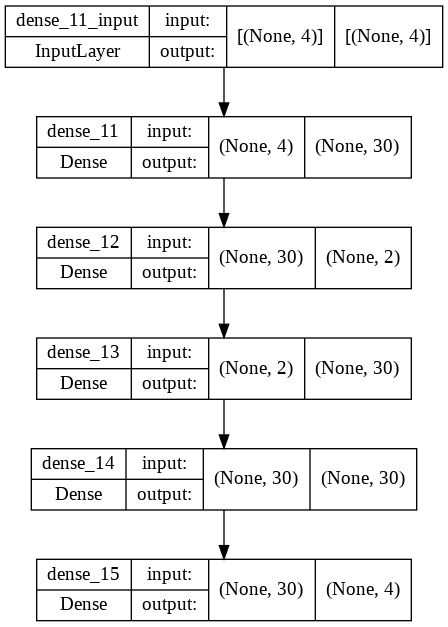

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after  epochs.
batch_size = 10
epochs = 100
validation_split = 0.05 # 10% of training set will be used for validation set. 

In [ ]:
num_images = X_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

In [ ]:
# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.10,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_1  (None, 30)               272       
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 2)                124       
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 30)               152       
 3 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 30)               1832      
 4 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 4)               

In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]


In [ ]:
model_for_pruning.fit(X_train, X_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,callbacks=callbacks)

Epoch 1/100
  1/171 [..............................] - ETA: 13:19 - loss: 0.0095 - accuracy: 0.5000WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0051s vs `on_train_batch_end` time: 0.0195s). Check your callbacks.


171/171 [==============================] - 6s 8ms/step - loss: 0.0118 - accuracy: 0.5386 - val_loss: 0.0124 - val_accuracy: 0.8681
Epoch 2/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0119 - accuracy: 0.5398 - val_loss: 0.0115 - val_accuracy: 0.8791
Epoch 3/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.5304 - val_loss: 0.0125 - val_accuracy: 0.8681
Epoch 4/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.5357 - val_loss: 0.0113 - val_accuracy: 0.9231
Epoch 5/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.5304 - val_loss: 0.0128 - val_accuracy: 0.9231
Epoch 6/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.5374 - val_loss: 0.0118 - val_accuracy: 0.8571
Epoch 7/100
171/171 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.5333 - val_loss: 0.0119 - val_accuracy: 0.8681
Epoch 8/100

In [ ]:
model_for_pruning_accuracy = model_for_pruning.evaluate(X_test, X_test, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)

Baseline test accuracy: 24.96489715576172
Pruned test accuracy: [24.846662521362305, 0.6071110963821411]


In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: /tmp/tmpuslg8x_k.h5


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

INFO:tensorflow:Assets written to: /tmp/tmpsikgiaem/assets


INFO:tensorflow:Assets written to: /tmp/tmpsikgiaem/assets


Saved pruned TFLite model to: /tmp/tmpr6tgqasu.tflite


In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))

Size of gzipped baseline Keras model: 7212.00 bytes
Size of gzipped pruned Keras model: 4014.00 bytes
Size of gzipped pruned TFlite model: 3057.00 bytes


In [ ]:
# Create a 10x smaller model from combining pruning and quantization
# You can apply post-training quantization to the pruned model for additional benefits.
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

INFO:tensorflow:Assets written to: /tmp/tmpixa__m34/assets


INFO:tensorflow:Assets written to: /tmp/tmpixa__m34/assets


Saved quantized and pruned TFLite model to: /tmp/tmp20gwuawc.tflite
Size of gzipped baseline Keras model: 7212.00 bytes
Size of gzipped pruned and quantized TFlite model: 3021.00 bytes


In [ ]:
model_for_pruning.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_1  (None, 30)               272       
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 2)                124       
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 30)               152       
 3 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 30)               1832      
 4 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 4)               

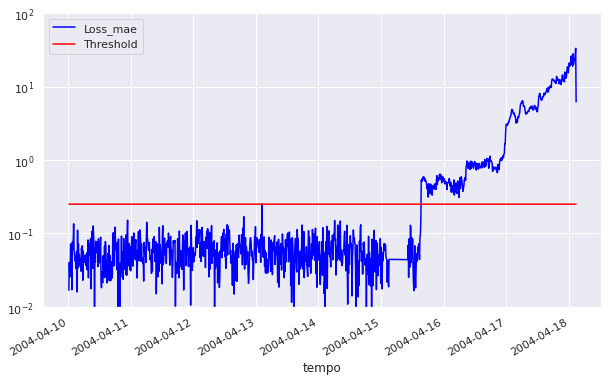

In [ ]:
X_pred_prun = model_for_pruning.predict(np.array(X_test))
X_pred_prun = pd.DataFrame(X_pred_prun, columns=X_test.columns)
X_pred_prun.index = X_test.index

scored_prun = pd.DataFrame(index=X_test.index)
scored_prun['Loss_mae'] = np.mean(np.abs(X_pred_prun-X_test), axis = 1)
scored_prun['Threshold'] = 0.25
scored_prun['Anomaly'] = scored_prun['Loss_mae'] > scored_prun['Threshold']
scored_prun['Loss_mae'] = np.mean(np.abs(X_pred_prun-X_test), axis = 1)
scored_prun.plot(logy= True , figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

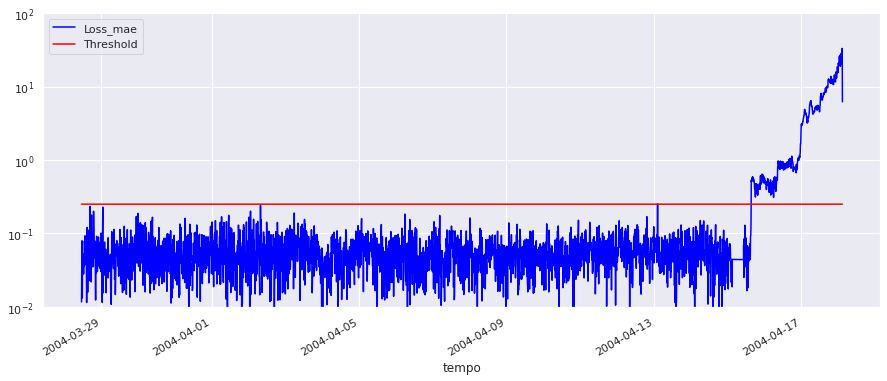

In [ ]:
X_pred_train_prun = model_for_pruning.predict(np.array(X_train))
X_pred_train_prun = pd.DataFrame(X_pred_train_prun, columns=X_train.columns)
X_pred_train_prun.index = X_train.index

scored_train_prun = pd.DataFrame(index=X_train.index)
scored_train_prun['Loss_mae'] = np.mean(np.abs(X_pred_train_prun-X_train), axis = 1)
scored_train_prun['Threshold'] = 0.25
scored_train_prun['Anomaly'] = scored_train_prun['Loss_mae'] > scored_train_prun['Threshold']
scored_prun = pd.concat([scored_train_prun, scored_prun])
scored_prun.plot(logy= True , figsize = (15,6), ylim = [1e-2,1e2], color = ['blue','red'])

### **Weight clustering in Keras**

In [ ]:
import tensorflow_model_optimization as tfmot

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 4,
  'cluster_centroids_init': CentroidInitialization.LINEAR
}

# Cluster a whole model
clustered_model = cluster_weights(model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss='mse',
  optimizer='adam')

clustered_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_dense_11 (ClusterWe  (None, 30)               274       
 ights)                                                          
                                                                 
 cluster_dense_12 (ClusterWe  (None, 2)                126       
 ights)                                                          
                                                                 
 cluster_dense_13 (ClusterWe  (None, 30)               154       
 ights)                                                          
                                                                 
 cluster_dense_14 (ClusterWe  (None, 30)               1834      
 ights)                                                          
                                                                 
 cluster_dense_15 (ClusterWe  (None, 4)               

In [ ]:
# Fine-tune model
clustered_model.fit(
  X_train,
  X_train,
  batch_size=10,
  epochs=100,
  validation_split=0.05)

Epoch 1/100
171/171 [==============================] - 2s 4ms/step - loss: 0.0284 - val_loss: 0.0190
Epoch 2/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0769 - val_loss: 0.0472
Epoch 3/100
171/171 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.0152
Epoch 4/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0135 - val_loss: 0.0186
Epoch 5/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0124 - val_loss: 0.0138
Epoch 6/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0129 - val_loss: 0.0137
Epoch 7/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0122 - val_loss: 0.0142
Epoch 8/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0131
Epoch 9/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0105 - val_loss: 0.0111
Epoch 10/100
171/171 [==============================] - 1s 3ms/step - loss: 0.0104 - val_lo

In [ ]:
final_model = tfmot.clustering.keras.strip_clustering(clustered_model)

_, clustered_keras_file = tempfile.mkstemp('.h5')
print('Saving clustered model to: ', clustered_keras_file)
tf.keras.models.save_model(final_model, clustered_keras_file, 
                           include_optimizer=False)

Saving clustered model to:  /tmp/tmpmr5m2efe.h5


In [ ]:
clustered_tflite_file = '/tmp/clustered_mnist.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_clustered_model = converter.convert()
with open(clustered_tflite_file, 'wb') as f:
  f.write(tflite_clustered_model)
print('Saved clustered TFLite model to:', clustered_tflite_file)

INFO:tensorflow:Assets written to: /tmp/tmpi2036usz/assets


INFO:tensorflow:Assets written to: /tmp/tmpi2036usz/assets


Saved clustered TFLite model to: /tmp/clustered_mnist.tflite


In [ ]:
def get_gzipped_model_size(file):
  # It returns the size of the gzipped model in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)
    print('Saved clustered TFLite model to:', zipped_file)
  return os.path.getsize(zipped_file)

In [ ]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered Keras model: %.2f bytes" % (get_gzipped_model_size(clustered_keras_file)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(clustered_tflite_file)))


Saved clustered TFLite model to: /tmp/tmpb_sfs6im.zip
Size of gzipped baseline Keras model: 7212.00 bytes
Saved clustered TFLite model to: /tmp/tmpbh50x42z.zip
Size of gzipped clustered Keras model: 2634.00 bytes
Saved clustered TFLite model to: /tmp/tmpk5jb4lry.zip
Size of gzipped clustered TFlite model: 1985.00 bytes


In [ ]:
print("Size of gzipped MODEL_TF: %.2f bytes" % (get_gzipped_model_size(MODEL_TF)))
print("Size of gzipped MODEL_NO_QUANT_TFLITE: %.2f bytes" % (get_gzipped_model_size(MODEL_NO_QUANT_TFLITE)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(MODEL_PTQ_TFLITE)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(MODEL_QAT_TFLITE)))


Saved clustered TFLite model to: /tmp/tmpq3kw7aot.zip
Size of gzipped MODEL_TF: 124.00 bytes
Saved clustered TFLite model to: /tmp/tmpxi2k9e83.zip
Size of gzipped MODEL_NO_QUANT_TFLITE: 6203.00 bytes
Saved clustered TFLite model to: /tmp/tmpa7ppc7gq.zip
Size of gzipped clustered TFlite model: 2709.00 bytes
Saved clustered TFLite model to: /tmp/tmpvpgfo8ql.zip
Size of gzipped clustered TFlite model: 2829.00 bytes


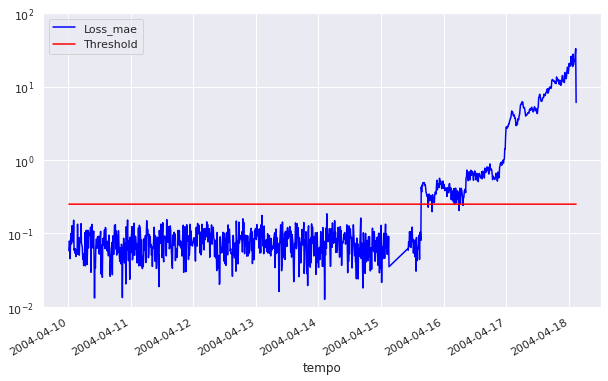

In [ ]:
X_pred_clus = clustered_model.predict(np.array(X_test))
X_pred_clus = pd.DataFrame(X_pred_clus, columns=X_test.columns)
X_pred_clus.index = X_test.index

scored_clus = pd.DataFrame(index=X_test.index)
scored_clus['Loss_mae'] = np.mean(np.abs(X_pred_clus-X_test), axis = 1)
scored_clus['Threshold'] = 0.25
scored_clus['Anomaly'] = scored_clus['Loss_mae'] > scored_clus['Threshold']
scored_clus['Loss_mae'] = np.mean(np.abs(X_pred_clus-X_test), axis = 1)
scored_clus.plot(logy= True , figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [ ]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_ptq_tflite = os.path.getsize(MODEL_PTQ_TFLITE)
size_qat_tflite = os.path.getsize(MODEL_QAT_TFLITE)
size_pru_tflite = os.path.getsize(quantized_and_pruned_tflite_file)
size_clus_tflite = os.path.getsize(clustered_tflite_file)
print(f'TF Model Size = {size_tf} kB')
print(f'TF Lite No Quant Model Size = {size_no_quant_tflite} kB')
print(f'TF Lite Post-Training Int Quantization Model Size = {size_ptq_tflite} kB')
print(f'TF Lite Quantization Aware Training Model Size = {size_qat_tflite} kB')
print(f'TF Lite Pruning Training Model Size = {size_pru_tflite} kB')
print(f'TF Lite Weight Clustering Training Model Size = {size_clus_tflite} kB')

TF Model Size = 4096 kB
TF Lite No Quant Model Size = 8016 kB
TF Lite Post-Training Int Quantization Model Size = 4608 kB
TF Lite Quantization Aware Training Model Size = 5544 kB
TF Lite Pruning Training Model Size = 8016 kB
TF Lite Weight Clustering Training Model Size = 7804 kB


In [ ]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {pruned_tflite_file} > {MODEL_PRU_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = pruned_tflite_file.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_PRU_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_PRU_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_PRU_TFLITE_MICRO}

In [ ]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {clustered_tflite_file} > {MODEL_CLU_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = clustered_tflite_file.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_CLU_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_CLU_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_CLU_TFLITE_MICRO}